<a href="https://colab.research.google.com/github/jsansao/idl/blob/main/Licao1_RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 1 - Regressão linear 

## Carregando os dados

In [8]:
import numpy as np  #python library for scientific computing
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) 

In [80]:
!wget https://raw.githubusercontent.com/jsansao/idl/main/ex1data2.txt

--2022-03-29 22:18:32--  https://raw.githubusercontent.com/jsansao/idl/main/ex1data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘ex1data2.txt.1’

ex1data2.txt.1      100%[===================>]     657  --.-KB/s    in 0s      

2022-03-29 22:18:32 (57.7 MB/s) - ‘ex1data2.txt.1’ saved [657/657]



In [9]:

data = np.loadtxt("ex1data2.txt",dtype=np.float64,delimiter=",")
data[:5,::] #dataset loaded demonstration




array([[  2104.,      3., 399900.],
       [  1600.,      3., 329900.],
       [  2400.,      3., 369000.],
       [  1416.,      2., 232000.],
       [  3000.,      4., 539900.]])

In [10]:
X = data[::,0:2]
Y = data[::,-1:]

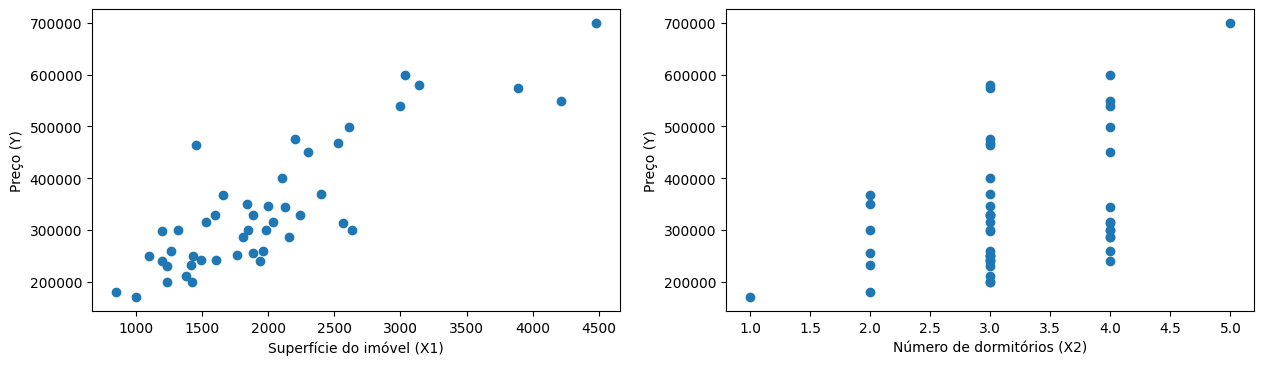

In [12]:
# Gráfico da dispersão
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[::,0:1],Y)
plt.xlabel("Superfície do imóvel (X1)")
plt.ylabel("Preço (Y)")

plt.subplot(122)
plt.scatter(X[::,-1:],Y)
plt.xlabel("Número de dormitórios (X2)")
plt.ylabel("Preço (Y)")
plt.show()

## Gradiente descendente

In [16]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,3)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,n+1))
X_bias[::,1:] = X
# output first 5 X_bias examples
X_bias[0:5,:]
Y[0:5,::]

array([[399900.],
       [329900.],
       [369000.],
       [232000.],
       [539900.]])

In [17]:
#feature scaling
# it also protect program from overflow error
mean_size = np.mean(X_bias[::,1:2])
mean_bedroom = np.mean(X_bias[::,2:])
size_std = np.std(X_bias[::,1:2])
bedroom_std = np.std(X_bias[::,2:])
X_bias[::,1:2] = (X_bias[::,1:2] - mean_size)/ (size_std) 
X_bias[::,2:] = (X_bias[::,2:] - mean_bedroom)/ (bedroom_std)
X_bias[0:5,::]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [18]:
#define function to find cost
def cost(X_bias,Y,Theta):
    np.seterr(over='raise')
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [19]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,2] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()
    return Theta

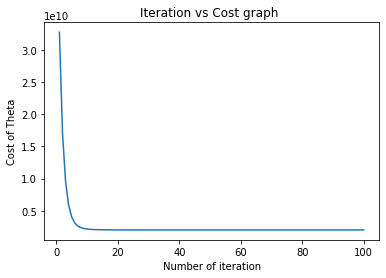

array([[340412.65957447, 109447.7552595 ,  -6578.31364402]])

In [22]:
alpha = 0.3
iterations = 100
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
Theta

In [24]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (size_std) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
hypothesis

array([293081.47339909])

## Solução exata (Equação normal)

In [33]:
import sklearn
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y

In [28]:
theta_best2 = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ Y

In [35]:
display(theta_best)
display(theta_best2)


array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

## Implementação Scikit-Learn

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_bias, Y)
lin_reg.intercept_, lin_reg.coef_

(array([340412.65957447]),
 array([[     0.        , 109447.79646964,  -6578.35485416]]))

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([89597.9095428]), array([[  139.21067402, -8738.01911233]]))

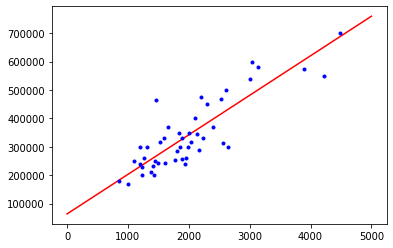

In [75]:
import matplotlib.pyplot as plt



X_new = np.array([[0, 3], [ 5000, 3]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best

plt.plot(X_new[::,0], y_predict, "r-", label="Predictions")
plt.plot(X[::,0], Y, "b.")


plt.show()


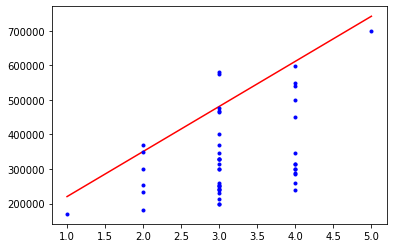

In [79]:

X_new = np.array([[1000, 1], [ 5000, 5]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best

plt.plot(X_new[::,1], y_predict, "r-", label="Predictions")
plt.plot(X[::,1], Y, "b.")


plt.show()
